# 1. Problem Statement

Rossmann is a European drug distributor which operates over 3,000 drug stores across seven European countries. Since a lot of drugs come with a short shelf life, that is, they do not have a long expiry date, it becomes imperative for Rossmann to accurately forecast sales at their individual stores. Currently, the forecasting is taken care of by the store managers who are tasked with forecasting daily sales for the next six weeks. 

Since the company is just embarking on this project, the scope has been kept to nine key stores across Europe. The stores are key for the company keeping in mind the revenue and historical prestige associated with them. These stores are numbered - 1,3,8,9,13,25,29,31 and 46.

# 2. Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
stores = pd.read_csv("store.csv")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11256\2151903664.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


In [3]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
stores

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
# Merging stores dataframe into train dataframe
df = train.merge(stores, on = "Store", how = "left")

In [8]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# 3. Data cleaning

## 3.1. Convert data format

In [9]:
# Column "StateHoliday" have mixed datatypes with both numerical 0 and string "0"
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None
df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [10]:
# StateHoliday will be turned into binary variable to keep it simple:
df['StateHoliday'].replace(['a','b','c'], 1, inplace = True)
df['StateHoliday'].replace("0",0, inplace = True)

In [11]:
# Convert column "Date" into datetime datadtype
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)

In [12]:
print(df["Date"].min())
print(df["Date"].max())

2013-01-01 00:00:00
2015-07-31 00:00:00


In [13]:
# Extract year, month from Date column for further EDA:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

## 3.2. Filter data for 9 key stores only

Since the company is just embarking on this project, the scope has been kept to nine key stores across Europe. The stores are key for the company keeping in mind the revenue and historical prestige associated with them. These stores are numbered - 1,3,8,9,13,25,29,31 and 46.

In [14]:
key_stores = [1,3,8,9,13,25,29,31,46]

In [15]:
df = df[df["Store"].isin(key_stores)]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8110 entries, 0 to 1016140
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      8110 non-null   int64         
 1   DayOfWeek                  8110 non-null   int64         
 2   Date                       8110 non-null   datetime64[ns]
 3   Sales                      8110 non-null   int64         
 4   Customers                  8110 non-null   int64         
 5   Open                       8110 non-null   int64         
 6   Promo                      8110 non-null   int64         
 7   StateHoliday               8110 non-null   int64         
 8   SchoolHoliday              8110 non-null   int64         
 9   StoreType                  8110 non-null   object        
 10  Assortment                 8110 non-null   object        
 11  CompetitionDistance        8110 non-null   float64       
 12  Com

## 3.3. Treating missing values

In [17]:
df.isna().sum()

Store                           0
DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
StoreType                       0
Assortment                      0
CompetitionDistance             0
CompetitionOpenSinceMonth    1700
CompetitionOpenSinceYear     1700
Promo2                          0
Promo2SinceWeek              5652
Promo2SinceYear              5652
PromoInterval                5652
Year                            0
Month                           0
dtype: int64

In [18]:
# Although there are no missing values in CompetitionDistance, there are some missing values in CompetitionOpenSinceMonth and SinceYear.
# We will replace these missing values with the median in the store dataframe:
df.loc[df['CompetitionOpenSinceMonth'].isna(),'CompetitionOpenSinceMonth'] = stores['CompetitionOpenSinceMonth'].median()
df.loc[df['CompetitionOpenSinceYear'].isna(),'CompetitionOpenSinceYear'] = stores['CompetitionOpenSinceYear'].median()

In [19]:
# Because some stores do not participate in promo2, there should be some missing values in Promo2SinceWeek and SinceYear
# We will replace these missing value with 0 and NA:
df.loc[df['Promo2SinceWeek'].isna(),'Promo2SinceWeek'] = 0
df.loc[df['Promo2SinceYear'].isna(),'Promo2SinceYear'] = 0
df.loc[df['PromoInterval'].isna(),'PromoInterval'] = "NA"

## 3.4. Treating outliers

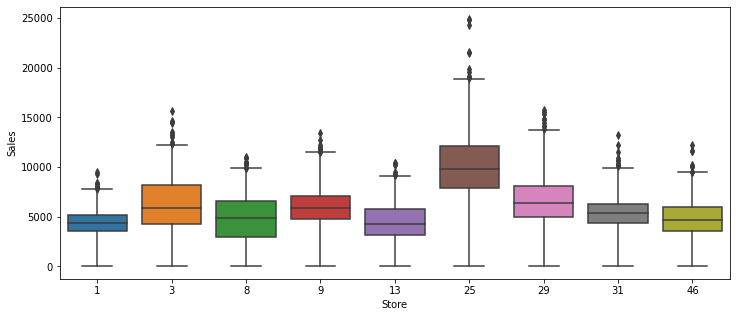

In [20]:
# There are some outliers at the 99th percentile of Sales:
fig = plt.subplots(figsize=(12, 5))
ax = sns.boxplot(x='Store', y='Sales', data=df, whis=[0,99])

In [21]:
Sale_99th = df['Sales'].quantile(0.99)
Sale_99th

14810.279999999999

In [22]:
# Find outliers at the 99th percentile of Sales:
df[df['Sales'] > Sale_99th]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
34589,25,2,2015-06-30,16572,1880,1,1,0,1,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2015,6
51318,29,1,2015-06-15,14823,1059,1,1,0,0,d,c,2170.0,8.0,2010.0,0,0.0,0.0,NA,2015,6
66924,25,1,2015-06-01,16017,2043,1,1,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2015,6
66928,29,1,2015-06-01,15316,1111,1,1,0,0,d,c,2170.0,8.0,2010.0,0,0.0,0.0,NA,2015,6
98144,25,1,2015-05-04,16048,2017,1,1,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931379,25,1,2013-03-18,16325,2158,1,1,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2013,3
946989,25,1,2013-03-04,16651,2205,1,1,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2013,3
962599,25,1,2013-02-18,15327,2092,1,1,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2013,2
977094,25,2,2013-02-05,14860,2052,1,1,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2013,2


In [23]:
# We will impute these outliers with the 99th percentile:
df.loc[df['Sales'] > Sale_99th, 'Sales'] = 14810

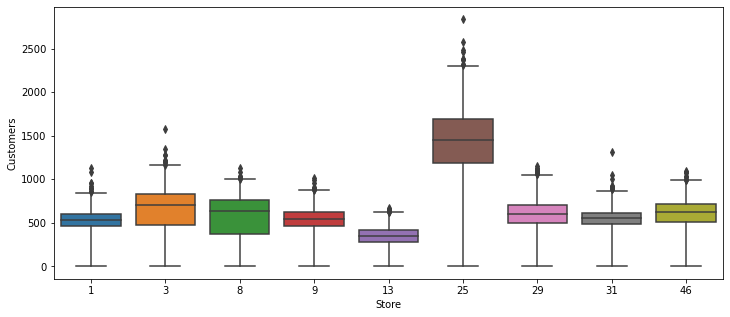

In [24]:
# Find outliers at the 99th percentile of Customers:
fig = plt.subplots(figsize=(12, 5))
ax = sns.boxplot(x='Store', y='Customers', data=df, whis=[0,99])

In [25]:
Customer_99th = df['Customers'].quantile(0.99)
Customer_99th

1929.9099999999999

In [26]:
# Find outliers at the 99th percentile of Customers:
df[df['Customers'] > Customer_99th]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
66924,25,1,2015-06-01,14810,2043,1,1,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2015,6
98144,25,1,2015-05-04,14810,2017,1,1,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2015,5
102604,25,4,2015-04-30,14810,2116,1,1,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2015,4
133824,25,4,2015-04-02,14810,2060,1,1,0,1,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2015,4
168389,25,1,2015-03-02,14810,2003,1,1,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962599,25,1,2013-02-18,14810,2092,1,1,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2013,2
975979,25,3,2013-02-06,14304,2038,1,1,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2013,2
977094,25,2,2013-02-05,14810,2052,1,1,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2013,2
978209,25,1,2013-02-04,14810,2177,1,1,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,NA,2013,2


In [27]:
# We will impute these outliers with the 99th percentile:
df.loc[df['Customers'] > Customer_99th, 'Customers'] = 1929

# 4. Exploratory data analysis

## 4.1. Sale analysis

In [28]:
monthly_sale = pd.pivot_table(df, values = 'Sales', index = ['Year','Month'], aggfunc='sum')

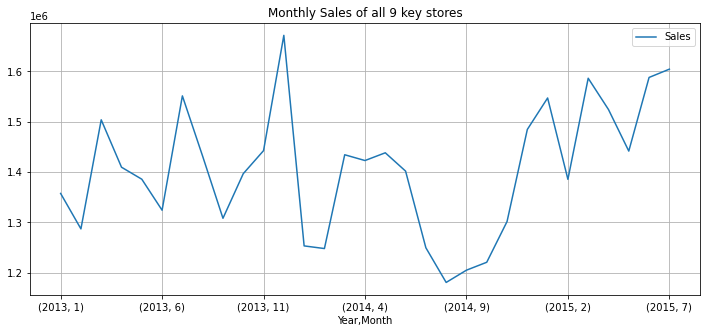

In [29]:
monthly_sale.plot(kind='line',
                  title='Monthly Sales of all 9 key stores',
                  figsize=(12,5),
                  grid=True)
plt.show()

- Monthly sales in 2014 seem to be lower than sales in the same month in 2013.
- August 2014 has the lowest sale volume in the period 2013-2015. 
- After August 2014, there is a clear upward trend in sales.

In [30]:
# Analyze sales by key stores:
sales_by_stores = pd.pivot_table(df, values = 'Sales', index = ['StoreType','Store'], aggfunc='sum')

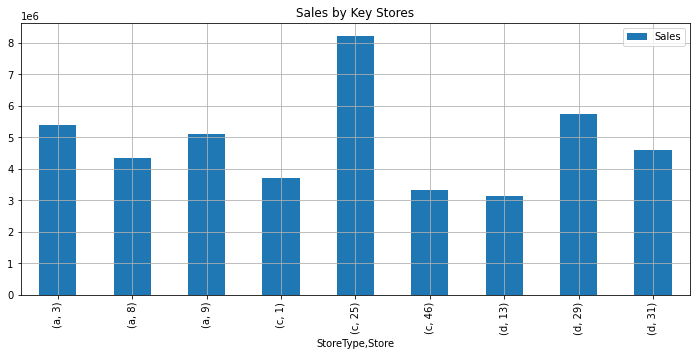

In [31]:
sales_by_stores.plot(kind='bar',
                  title='Sales by Key Stores',
                  figsize=(12,5),
                  grid=True)
plt.show()

- Each store types (a,c,d) has 3 key stores across Europe. There are no key stores belong to store type b.
- Store number 25 has much higher sales volume compared to other key stores during the period.

In [32]:
# Analyze sales by store types:
sales_by_store_types = pd.pivot_table(df, values = 'Sales', index = ['Year','Month'], columns = 'StoreType', aggfunc='sum')

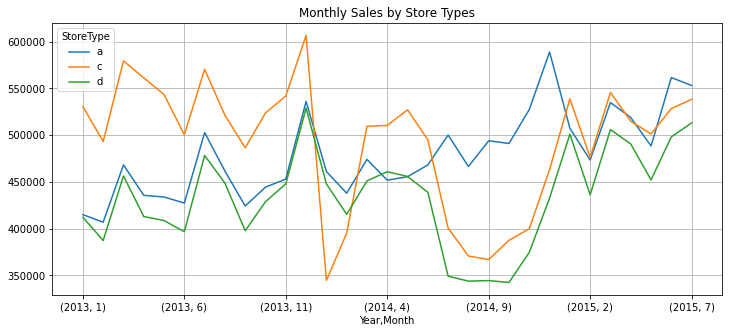

In [33]:
sales_by_store_types.plot(kind='line',
                  title='Monthly Sales by Store Types',
                  figsize=(12,5),
                  grid=True)
plt.show()

After breaking down monthly sales by store types, we can clearly see that:
- Only "store type a" has consistent upward trend with stable seasonality during the period.
- Although sale volume of "store type d" has quite similar movement as "store type a", it suffers the same drop in 2014 as "store type c".
- "Store type c" has volatile monthly sales volume during 2013-2014 and only starts to have similar movement with other store types since 2015. 

In [34]:
# Analyze sales by assortment types:
pd.pivot_table(df, values = 'Sales', index = ['Assortment','Store'], aggfunc='sum')

Sales
Assortment Store         
a          1      3716854
           3      5407382
           8      4342857
           13     3126578
           25     8226194
           46     3329125
c          9      5112061
           29     5734954
           31     4596143

In [35]:
# Because there are 6 out of 9 key stores belong to assortment type a,
# there will be vast different in total sales between assortment type a and c
# Therefore, we will compare average sale between assortment type:
pd.pivot_table(df, values = 'Sales', index = 'Assortment', aggfunc='mean')

,Sales
Assortment,
a,5327.212339
c,5464.670205


There are no significant difference in average sale volume between assortment type a and c.

## 4.2. Analyze impacts of other variables on Sales

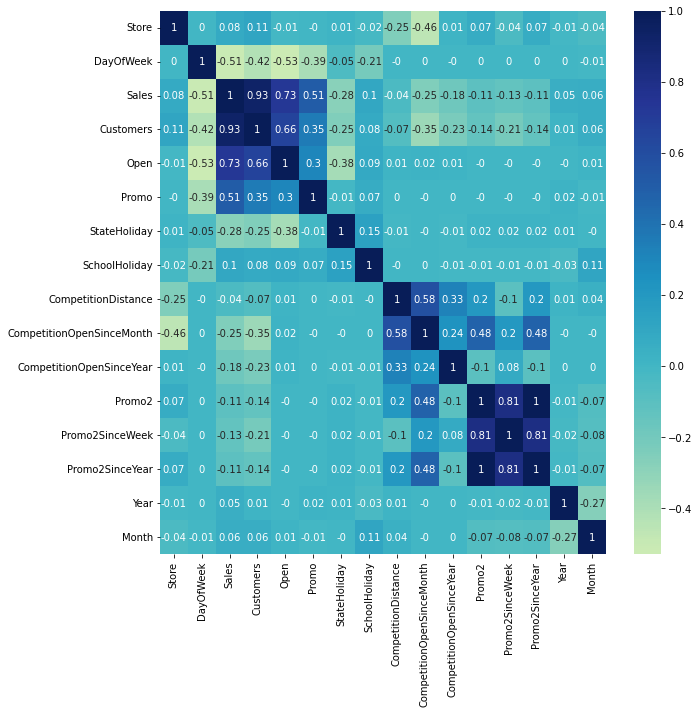

In [36]:
corr = df.corr()
corr = corr.round(2)
plt.figure(figsize = (10,10))
sns.heatmap(corr, center=0, cmap="YlGnBu", annot=True)
plt.show()

- Sales is positively correlated with Customers, Open and Promo.
- Sales is negatively correlated with DayofWeek, which means Sales tends to be higher in beginning of weeks than in weekends.
- Surprisingly, Sales is not significantly correlated with Promo2 and CompetitionDistance.

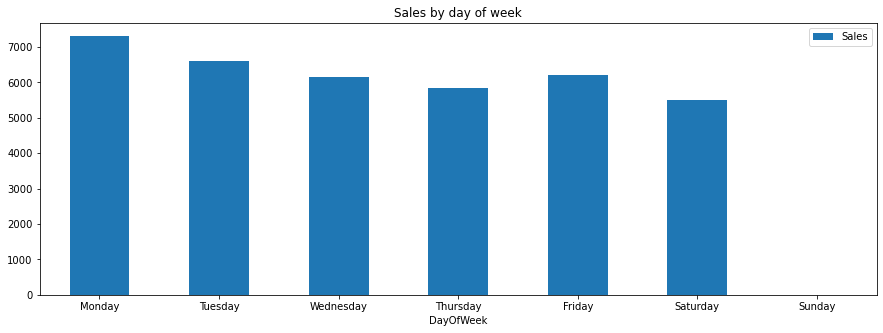

In [37]:
# Analyze sales by day of week:
sales_by_DOW = pd.pivot_table(df, values = 'Sales', index = 'DayOfWeek', aggfunc='mean')
sales_by_DOW.plot(kind='bar',
                  title='Sales by day of week',
                  figsize=(15,5))
plt.xticks(plt.xticks()[0], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 0)
plt.show()

We can see that Monday has the highest average sales. In contrast, Sunday has no sales at all. May be the stores are closed on Sunday.

In [38]:
# Check whether stores are closed on Sunday:
df[df['DayOfWeek']==7]['Open'].value_counts()

0    1154
Name: Open, dtype: int64

Apparently no key stores are opened on Sunday.

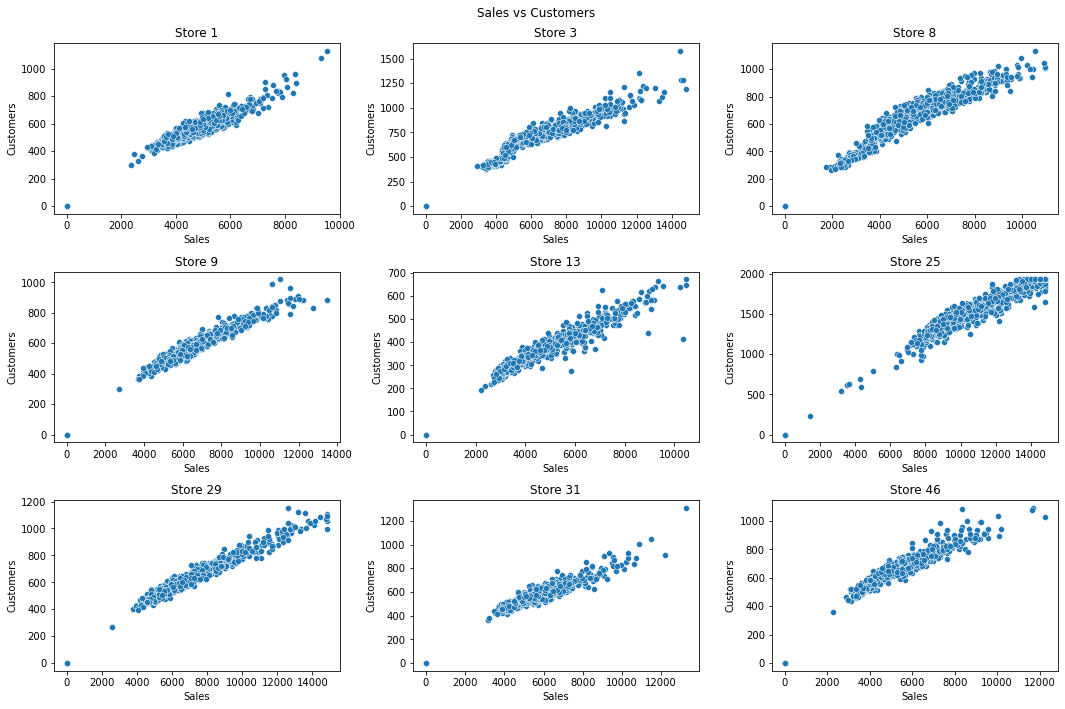

In [39]:
# Analyze Sales vs Customers
fig, axs = plt.subplots(3,3,figsize=(15,10))
for i, ax in enumerate(axs.flatten()):
    sns.scatterplot(x='Sales',y='Customers',data=df[df['Store']==key_stores[i]],ax=ax)
    ax.set_title('Store '+ str(key_stores[i]))
plt.suptitle('Sales vs Customers')
fig.tight_layout()
plt.show()

We can see that sales and customers of each stores are highly correlated.

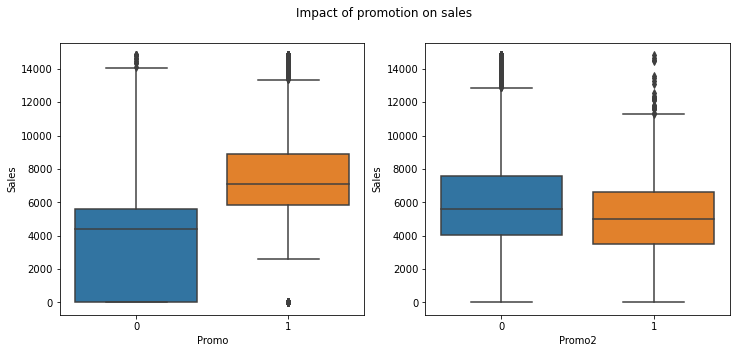

In [40]:
# Analyze effect of promo on sales:
fig, axs = plt.subplots(1,2, figsize = (12,5))
sns.boxplot(y='Sales',x='Promo',data=df, ax = axs[0])
sns.boxplot(y='Sales',x='Promo2',data=df, ax = axs[1])
plt.suptitle('Impact of promotion on sales')
plt.show()

Promo has significant impact on Sales, whereas Promo2 doesnt have any impact.

**Conclusion: after performing EDA, we conclude that only following columns should be considered for model building:**
- Store
- DayOfWeek
- Date
- Sales
- Customers
- Open
- Promo

In [41]:
df =df[['Store','DayOfWeek','Date','Sales','Customers','Open','Promo']]

# 5. Model building for Store 1

## 5.1. Data Preparation

In [42]:
from pylab import rcParams
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from pmdarima.arima import auto_arima

In [43]:
# Setting Date as index and sort the index 
df.set_index('Date', inplace = True)
df.sort_index(inplace=True)

In [44]:
# Create a dataframe to store the results:
# Because future Sales can be 0 (stores are closed, thus there are no sales), MAPE cannot be calculated when Sales = 0
# Therefore, we will use RMSE and MAE instead
results = pd.DataFrame(columns= ['Store','Model','RMSE','MAE'])

In [45]:
store1 = df[df['Store']==1]
del store1['Store']

In [46]:
train = store1[:-42].copy()
test = store1[-42:].copy() # last 6 weeks as test set

## 5.2. Time Series Analysis

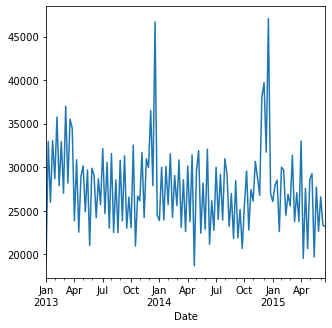

In [47]:
# Visualize weekly sales of Store 1:
plt.figure(figsize = (5,5))
train['Sales'].resample('W').sum().plot()
plt.show()

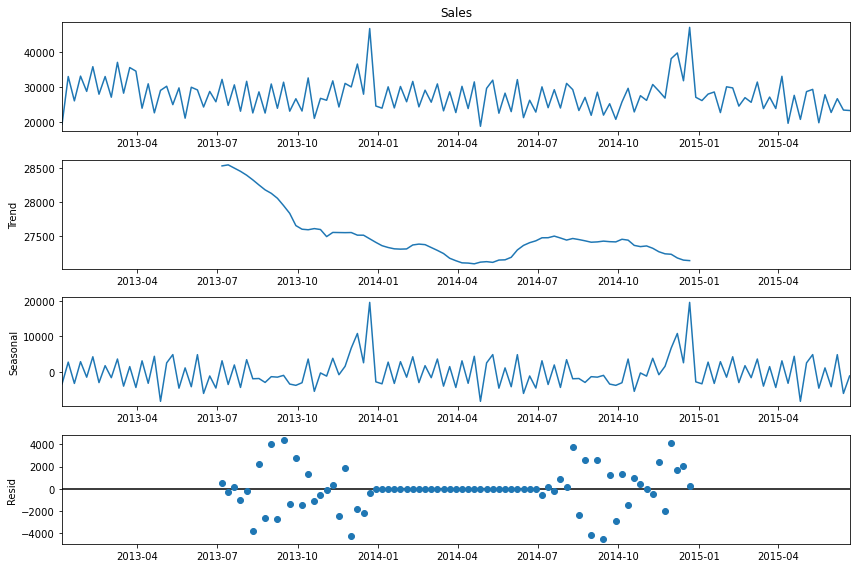

In [48]:
# Check decomposition plots:
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train['Sales'].resample('W').sum(), model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

In [49]:
# Stationarity test:
result = adfuller(train['Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1] <= 0.05:
    print('Stationary')
else:
    print('Not stationary')

ADF Statistic: -4.255486
p-value: 0.000530
Stationary


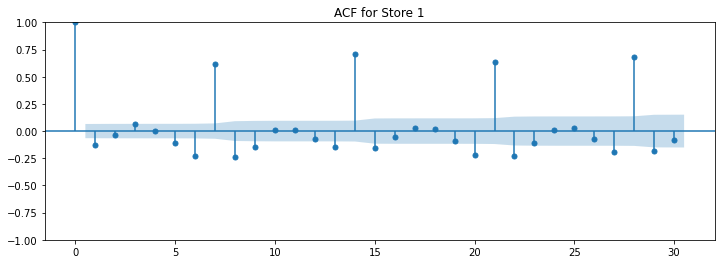

In [50]:
# Check ACF and PACF:
plt.figure(figsize=(12,4))
plot_acf(train['Sales'], ax=plt.gca(), lags = 30)
plt.title('ACF for Store 1')
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


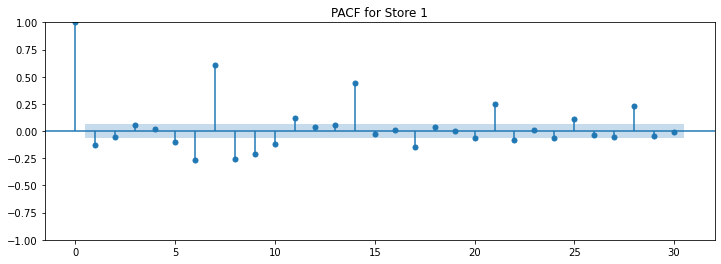

In [51]:
plt.figure(figsize=(12,4))
plot_pacf(train['Sales'], ax=plt.gca(), lags = 30)
plt.title('PACF for Store 1')
plt.show()

Conclusion:
- Because the time series is stationary, d value should be 0
- Based on ACF plot, q value should be 1
- Based on PACF plot, p value should be 7

## 5.3. Build SARIMAX model

In [52]:
# exogenous variables for train set and test set:
exog_train = train[['DayOfWeek','Customers','Open','Promo']]
exog_test = test[['DayOfWeek','Customers','Open','Promo']]

In [53]:
model = auto_arima(train['Sales'],
                   X = exog_train,
                   d = 0,
                   start_p = 0,
                   max_p = 7,
                   start_q = 0,
                   max_q = 1,
                   m = 12,
                   seasonal = True,
                   trace = True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=12589.649, Time=1.77 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=12598.656, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=12536.855, Time=1.67 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=12549.741, Time=1.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=12596.661, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=12536.156, Time=0.48 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=12536.934, Time=1.51 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=12537.428, Time=1.75 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=12528.551, Time=0.49 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=12532.741, Time=0.89 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=12530.217, Time=1.27 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=12532.584, Time=2.15 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=12527.036, Time=0.63 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=12528.863, Time=1.73 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  900
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -6233.693
Date:                            Thu, 24 Nov 2022   AIC                          12487.385
Time:                                    22:29:14   BIC                          12535.409
Sample:                                01-01-2013   HQIC                         12505.731
                                     - 06-19-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DayOfWeek     -2.6791      5.070     -0.528      0.597     -12.617       7.259
Customers      9.5219      0.099     96.183      0.000       9.328       9.716
Open        -761.1231     67.411    -11.291      0.000    -893.247    -628.999
Promo        435.5346     18.698     23.293      0.000     398.887     472.182
ar.L1          1.1324      0.039     29.201      0.000       1.056       1.208
ar.L2         -0.1376      0.038     -3.637      0.000      -0.212      -0.063
ma.L1         -0.9479      0.016    -61.011      0.000      -0.978      -0.917
ar.S.L12       0.6302      0.284      2.218      0.027       0.073       1.187
ma.S.L12      -0.6888      0.266     -2.587      0.010      -1.211      -0.167
sigma2      6.109e+04   2580.667     23.672      0.000     5.6e+04    6.61e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.55
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.09
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
# Predict using the best SARIMAX model from auto_arima:
test['SARIMAX_Sales'] = model.predict(42, X= exog_test).astype('int64')

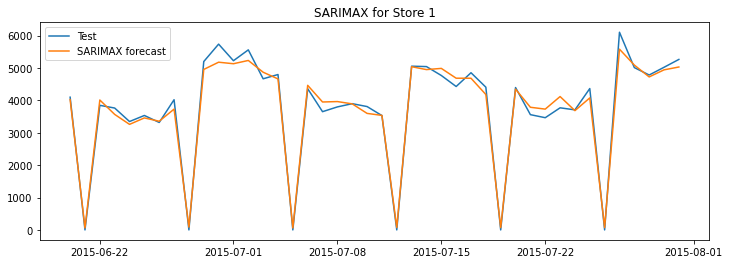

In [55]:
# Plot test vs forecast
plt.figure(figsize=(12,4))
plt.plot(test['Sales'], label='Test')
plt.plot(test['SARIMAX_Sales'], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX for Store 1')
plt.show()

In [56]:
# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test['Sales'], test['SARIMAX_Sales'])).round(2)
mae = mean_absolute_error(test['Sales'], test['SARIMAX_Sales']).round(2)

tempResults = pd.DataFrame({'Store':1,'Model':'SARIMAX','RMSE': [rmse], 'MAE':[mae]})
results = pd.concat([results, tempResults])
results

,Store,Model,Variable,RMSE,MAE
0,1,SARIMAX,Sales,206.7,163.29


## 5.3. Build VARMAX model

In [57]:
# Checking cointegration between Sales and Customers
joh_model = coint_johansen(train[['Sales','Customers']],-1,1)
traces = joh_model.lr1
cvts = joh_model.cvt  ## 0: 90%  1:95% 2: 99%
for i in range(2):
    if traces[i] > cvts[i, 1]:
        r = i + 1
if r == 2:
    print("Rank 2: no cointegration but the series are stationary => VARMAX model can be built")
elif r == 1:
    print("Rank 1: cointegration exists => VARMAX model can be built")
elif r == 0:
    print("Rank 0: no cointegration ⇒ cannot build a VARMAX model")

Rank 2: no cointegration but the series are stationary => VARMAX model can be built


In [58]:
# exogenous variables for train set and test set:
exog_train = train[['DayOfWeek','Open','Promo']]
exog_test = test[['DayOfWeek','Open','Promo']]

In [59]:
mod = sm.tsa.VARMAX(train[['Sales', 'Customers']].astype('float64'), order=(7,1), trend='n', exog=exog_train)
res = mod.fit(maxiter=100, disp=False)
print(res.summary())

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  900
Model:                        VARMAX(7,1)   Log Likelihood              -12447.046
Date:                    Thu, 24 Nov 2022   AIC                          24976.092
Time:                            22:29:42   BIC                          25172.990
Sample:                        01-01-2013   HQIC                         25051.309
                             - 06-19-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             0.12, 0.75   Jarque-Bera (JB):      1280.32, 217.49
Prob(Q):                        0.72, 0.39   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.14, 0.97   Skew:                     -0.69, -0.14
Prob(H) (two-sided):            0.24, 0.78   Kurtosis:                   8.68, 5.39


In [60]:
predictions = res.predict(start=exog_test.index.min(),end=exog_test.index.max(),exog=exog_test)

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


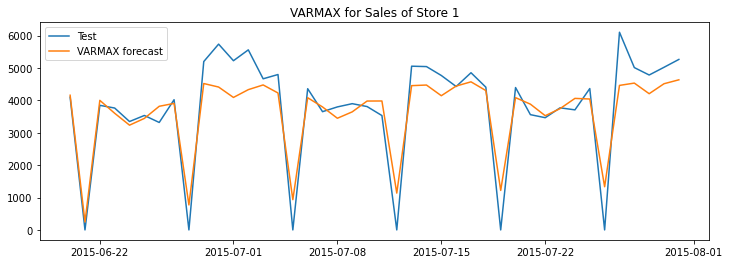

In [62]:
# Plot test vs forecast
plt.figure(figsize=(12,4))
plt.plot(test['Sales'], label='Test')
plt.plot(predictions['Sales'], label='VARMAX forecast')
plt.legend(loc='best')
plt.title('VARMAX for Sales of Store 1')
plt.show()

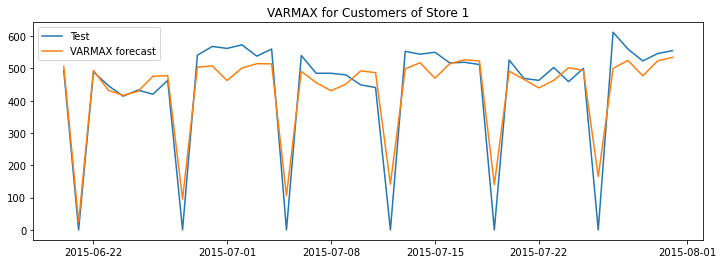

In [63]:
plt.figure(figsize=(12,4))
plt.plot(test['Customers'], label='Test')
plt.plot(predictions['Customers'], label='VARMAX forecast')
plt.legend(loc='best')
plt.title('VARMAX for Customers of Store 1')
plt.show()

In [64]:
# Calculate RMSE and MAE:
rmse = np.sqrt(mean_squared_error(test['Sales'], predictions['Sales'])).round(2)
mae = mean_absolute_error(test['Sales'], predictions['Sales']).round(2)

tempResults = pd.DataFrame({'Store':1,'Model':'VARMAX','RMSE': [rmse], 'MAE':[mae]})
results = pd.concat([results, tempResults])
results

,Store,Model,Variable,RMSE,MAE
0,1,SARIMAX,Sales,206.7,163.29
0,1,VARMAX,Sales,651.28,500.64


# 6. Conclusion